# Homework 3 - Andrea Lazzari


Considering the **Lotka-Volterra** equations:

*  Find the stationary solutions
*  Stability analysis of the stationary solutions
*  Simulate the equations, is there any range of parameters where we can observe sustained oscillations?

---
  

## General Framework

The addiction of **local interactions** provides a more realistic description of the dynamics of the population of an ecosystem, in fact with this, we can study emergent and collective behaviours.
The prey-predator dynamics is given by the **Lotka-Volterra equations**:

$$\begin{cases} 
\dfrac{dx}{dt} = ax - pxy \\ 
\\
\dfrac{dy}{dt} = -cy + pxy 
\end{cases}$$

where:
* $x$ and $y$ are the number of prey and predators
* $a$ and $c$ are respectively the growth rates of the prey and of the predators
* $p$ represents the intensity of the mutual interactions between the two kind of species

We can see that, for predators, there is no possibility of surviving without the presence of prey, so the growth rate $c$ of the predators has a negative sign. On the other hand, the growth rate of the prey is positive, so the prey can survive without the presence of predators.

The interaction between the two species is related to the value of the parameter $p$, which is positive for predators that eat prey and grow while il negative for preys, which are eaten by predators and die.


---

## Specific Case

Therefore we will consider the following equations:

$$\begin{cases} 
\dfrac{dx}{dt} = ax - pxy \\ 
\\
\dfrac{dy}{dt} = -cy + pxy 
\end{cases}$$

In order to find a stable solution, we need to find the **stationary solutions** of the system, that is the solutions of the system where the derivatives are equal to zero:

$$\begin{cases}
0 = ax - pxy \\
0 = -cy + pxy
\end{cases}$$

Apart from the trivial solution $ z^*_1 = (x^*_1,y^*_1) = (0,0)$, from the first equation we can find:

$$0 = ax - pxy \rightarrow \boxed{y^* = \dfrac{a}{p}}$$

Now we can substitute the value of $y$ in the second equation:

$$0 = -c \cdot \dfrac{a}{p} + \cancel{p} \cdot \dfrac{a}{\cancel{p}} x$$

$$ax = c \cdot \dfrac{a}{p} \rightarrow \boxed{x^* = \dfrac{c}{p}}$$

Therefore, in this case the stationary solutions are:

$$\begin{cases}

x^* = \dfrac{c}{p} \quad \quad \text{prey}\\   
\\
y^* = \dfrac{a}{p} \quad \quad \text{predators}
\end{cases}$$

---

## Stability Analysis

<p align="center">
 <img src = "StationaryPoint.svg">
</p>


We have found the stationary points:

$$\begin{cases}
z^*_1 = (x^*_1,y^*_1) = (0,0)\\
z^*_2 = (x^*_2,y^*_2) = (\frac{c}{p}, \frac{a}{p})\\
\end{cases}$$


In order to find the stability of the stationary solutions, we need to find the **Jacobian matrix** of the system:

$$J = \begin{pmatrix}
\dfrac{\partial f_1}{\partial x} & \dfrac{\partial f_1}{\partial y} \\
\\
\dfrac{\partial f_2}{\partial x} & \dfrac{\partial f_2}{\partial y}
\end{pmatrix}$$

where $f_1$ and $f_2$ are the two equations of the system.

Calculating the derivatives, we obtain:

$$J = \begin{pmatrix}
a - py & -px \\
py & -c + px
\end{pmatrix}$$

After that we evaluate it in the stationary points $z^*_1$ and $z^*_2$:

$$  J \rvert_{z^*_1} = \begin{pmatrix}
a & 0 \\
0 & -c
\end{pmatrix} \quad \quad 
J \rvert_{z^*_2} = \begin{pmatrix}
0 & -c \\
a & 0
\end{pmatrix} 
$$

The first matrix is already diagonal, so we can easily find the **eigenvalues**:
$$\lambda^1_1 = a \quad \quad \lambda^1_2 = -c$$

Immediately we can see that the first eigenvalue is positive and the second one is negative, therefore the first stationary point $z^*_1$ corresponds to and **unstable** equilibrium having a saddle. 

For the second matrix, from the diagonalization we find the following **eigenvalues**:

$$ \lambda^2_1 = + i \sqrt{ac} \quad \quad \lambda^2_2 = - i \sqrt{ac}$$

Both are complex numbers (in particular purely imaginary), therefore the system will be oscillatory.
Looking to the real part, that is equal to **zero**, the system behaves as an **undamped harmonic oscillator**.

In conclusion, the second stationary point $z^*_2$ is **stable**.


---


## Lotka-Volterra model simulation

In [1]:
import numpy as np
import scipy as scp

import matplotlib.pyplot as plt
import matplotlib

from scipy.integrate import odeint

In [2]:
#Lotka-Volterra model simulation

a = 0.04          # prey growth rate
c = 0.2           # predator growth rate
p = 0.005           # mutual "competition" intensity

x_0 = 100
y_0 = 10


def system(s, t, a, c, p):
    x, y = s
       
    dx_dt =  a*x - p*x*y               # Prey
    dy_dt = -c*y + p*x*y               # Predator 
    
    return [dx_dt, dy_dt]

t = np.linspace(0, 250, 1000)   # time_domain

s0 = [x_0, y_0]   # initial conditions

solution = odeint(system, s0, t, args=(a, c, p))

In [3]:
import pandas as pd 
import plotly.express as px
from dash import Dash, dcc, html
import plotly.graph_objs as go
from dash.dependencies import Input, Output


In [4]:
arr = np.array([t, solution[:,0], solution[:,1]]).T
df = pd.DataFrame(arr, columns = ['t[s]', 'Prey', 'Predators'])


In [5]:
fig = px.line(df , x='t[s]', title='Lotka-Volterra Model', y=['Prey', 'Predators'], 
              labels={'value':'Dynamics', 'variable':'Species', 't[s]':'t [s]'},
              markers=True, height=600, width=1200)
fig.update_layout(font=dict(size=20))
fig.show()

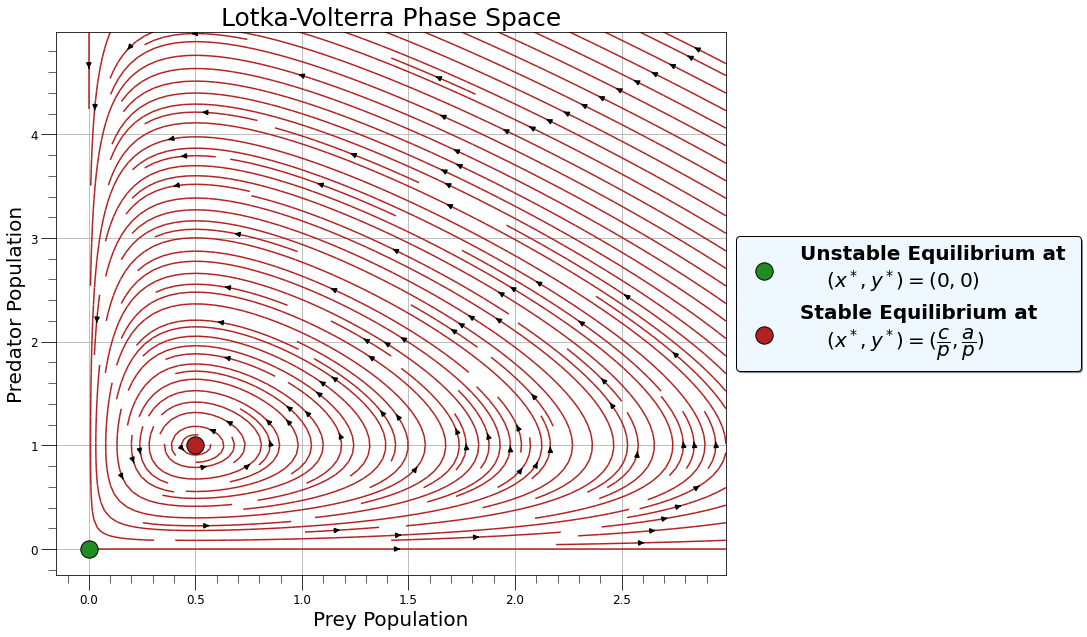

In [6]:
parameters = {'a' : 1, 'p' : 1, 'c' : 0.5}

solution_1 = (parameters['c'] / parameters['p'], parameters['a'] / parameters['p'])


X, Y = np.meshgrid(np.arange(0, 3, 0.01), np.arange(0, 5, 0.01))

U = X * (parameters['a'] - parameters['p'] * Y)
V = -Y * (parameters['c'] - parameters['p'] * X)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.grid(zorder = 1)

ax.tick_params(axis='both', which='major', labelsize=12, length=15)
ax.tick_params(axis='both', which='minor', labelsize=12, length=8)

ax.minorticks_on()

ax.streamplot(X, Y, U, V, color = 'firebrick', zorder = 2, density = 2, arrowstyle = '-|>', linewidth = 1.5)


                                                                     
for art in ax.get_children():                                        # iterate through the children of ax
                                                                     
    if not isinstance(art, matplotlib.patches.FancyArrowPatch):      # we are only interested in FancyArrowPatches
        continue
    art.set_edgecolor(matplotlib.colors.to_rgba('black'))          # remove the edge, fill with blue
    art.set_facecolor(matplotlib.colors.to_rgba('black'))
    
    art.set_zorder(10)                                      # make it bigger and move the arrow head to the front


ax.scatter(0, 0, label = 'Unstable Equilibrium at \n $\quad (x^*, y^*) = (0,0)$', color = 'forestgreen', zorder = 4, edgecolor = 'black', s = 300)
ax.scatter(solution_1[0], solution_1[1], label = 'Stable Equilibrium at \n $\quad (x^* , y^*) = (\dfrac{c}{p}, \dfrac{a}{p})$',\
     color = 'firebrick', zorder = 4, edgecolor = 'black', s = 300)

ax.legend(prop={'weight':'bold','size':20}, facecolor='aliceblue', \
 shadow=True, edgecolor='black', loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title('Lotka-Volterra Phase Space', fontsize = 25)
ax.set_xlabel('Prey Population', fontsize = 20)
ax.set_ylabel('Predator Population', fontsize = 20)
plt.show()


## Interactive plot

In this section we will simulate the Lotka-Volterra model, in order to see the behaviour of the system in different conditions.


Choose the parameters:
* `a`: growth rate of the prey
* `c`: growth rate of the predators
* `p`: intensity of the mutual interactions between the two kind of species
  
and the initial conditions:

* `x0`: initial number of prey
* `y0`: initial number of predators


Then click on the button `Submit` to start the simulation.

In [7]:
from jupyter_dash import JupyterDash
import dash
from dash import dcc
from dash import html
from dash.dependencies import Output, State, Input

pd.options.plotting.backend = "plotly"

app = JupyterDash(__name__)

app.layout = html.Div([
        dcc.Input(id='a', type='number', placeholder='a', style={'padding':3,'fontSize':18}),
        dcc.Input(id='c', type='number', placeholder='c', style={'padding':3,'fontSize':18}),
        dcc.Input(id='p', type='number', placeholder='p', style={'padding':3,'fontSize':18}),
        dcc.Input(id='x0', type='number', placeholder='x0', style={'padding':3,'fontSize':18}),
        dcc.Input(id='y0', type='number', placeholder='y0', style={'padding':3,'fontSize':18}),
        html.Button(id='submit-button', type='submit', children='Submit', style={'padding':10,'fontSize':18}),
        html.Div(id='output_div')], 
        
                      )

@app.callback(Output('output_div', 'children'),
             [Input('submit-button', 'n_clicks')],
             [State('a', 'value'), State('c', 'value'), State('p', 'value'), 
              State('x0', 'value'), State('y0', 'value')])
             
                                    
def update_output(clicks, a, c, p, x0, y0):
        if clicks is not None:
            s0 = [x0, y0]   # initial conditions
            solution = odeint(system, s0, t, args=(a, c, p))
            arr = np.array([t, solution[:,0], solution[:,1]]).T
            df = pd.DataFrame(arr, columns = ['t[s]', 'Prey', 'Predators'])
            fig = px.line(df , x='t[s]', title='Lotka-Volterra Model', y=['Prey', 'Predators'], 
              labels={'value':'Dynamics', 'variable':'Species', 't[s]':'t [s]'},
              markers=True, height=600, width=1200)
            fig.update_layout(font=dict(size=20))
            
            return dcc.Graph(figure=fig)



app.run_server(mode='inline')

For instance, we can see that the system has susteined oscillates for:
* `a`: growth rate of the prey equal to $1$
* `c`: growth rate of the predators equal to $0.5$
* `p`: intensity of the mutual interactions between the two kind of species equal to $1$
* `$x_0$`: initial population of prey equal to $1$
* `$y_0$`: initial population of predator equal to $1$
  